## EDA Analysis

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df=pd.read_csv('Orginal_after_frature_engineering_economic_indicators.csv')

In [135]:
df.head()

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value,Stock_Return,Volatility_3M,Volatility_Level,GDP_Unemployment,Inflation_Interest,Return_MA_3M,Return_Spike,GDP_Change,Inflation_Change,Unemployment_Change,Month,Quarter
0,2010-01-31,Brazil,1.23,0.69,10.4800,7.71,21748.85,NaN,NaN,NaN,7.231200,9.4833,NaN,0,NaN,NaN,NaN,1,1
1,2010-01-31,France,6.76,2.59,4.2700,7.39,10039.56,NaN,NaN,NaN,11.059300,49.9564,NaN,0,NaN,NaN,NaN,1,1
2,2010-01-31,USA,7.46,4.84,2.6400,6.39,13129.10,NaN,NaN,NaN,12.777600,47.6694,NaN,0,NaN,NaN,NaN,1,1
3,2010-02-28,Brazil,5.43,0.31,8.2600,6.09,23304.58,0.071532,NaN,NaN,2.560600,33.0687,NaN,1,-0.38,4.2,-2.22,2,1
4,2010-02-28,Canada,0.69,-0.52,11.8902,-0.51,16413.03,NaN,NaN,NaN,-6.182904,-0.3519,NaN,0,NaN,NaN,NaN,2,1


In [136]:
df.columns

Index(['Date', 'Country', 'Inflation Rate (%)', 'GDP Growth Rate (%)',
       'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value',
       'Stock_Return', 'Volatility_3M', 'Volatility_Level', 'GDP_Unemployment',
       'Inflation_Interest', 'Return_MA_3M', 'Return_Spike', 'GDP_Change',
       'Inflation_Change', 'Unemployment_Change', 'Month', 'Quarter'],
      dtype='object')

## Missing value handel

In [137]:
df.isnull().sum()

Date                      0
Country                   0
Inflation Rate (%)        0
GDP Growth Rate (%)       0
Unemployment Rate (%)     0
Interest Rate (%)         0
Stock Index Value         0
Stock_Return             10
Volatility_3M            30
Volatility_Level         30
GDP_Unemployment          0
Inflation_Interest        0
Return_MA_3M             30
Return_Spike              0
GDP_Change               10
Inflation_Change         10
Unemployment_Change      10
Month                     0
Quarter                   0
dtype: int64

In [138]:
df.dropna(inplace=True)

In [139]:
df.isnull().sum()

Date                     0
Country                  0
Inflation Rate (%)       0
GDP Growth Rate (%)      0
Unemployment Rate (%)    0
Interest Rate (%)        0
Stock Index Value        0
Stock_Return             0
Volatility_3M            0
Volatility_Level         0
GDP_Unemployment         0
Inflation_Interest       0
Return_MA_3M             0
Return_Spike             0
GDP_Change               0
Inflation_Change         0
Unemployment_Change      0
Month                    0
Quarter                  0
dtype: int64

### No missing value

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 17 to 499
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   470 non-null    object 
 1   Country                470 non-null    object 
 2   Inflation Rate (%)     470 non-null    float64
 3   GDP Growth Rate (%)    470 non-null    float64
 4   Unemployment Rate (%)  470 non-null    float64
 5   Interest Rate (%)      470 non-null    float64
 6   Stock Index Value      470 non-null    float64
 7   Stock_Return           470 non-null    float64
 8   Volatility_3M          470 non-null    float64
 9   Volatility_Level       470 non-null    object 
 10  GDP_Unemployment       470 non-null    float64
 11  Inflation_Interest     470 non-null    float64
 12  Return_MA_3M           470 non-null    float64
 13  Return_Spike           470 non-null    int64  
 14  GDP_Change             470 non-null    float64
 15  Inflation_

In [141]:
df.shape

(470, 19)

In [142]:
df['Return_Spike'] = df['Return_Spike'].astype(bool)

In [143]:
df.columns

Index(['Date', 'Country', 'Inflation Rate (%)', 'GDP Growth Rate (%)',
       'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value',
       'Stock_Return', 'Volatility_3M', 'Volatility_Level', 'GDP_Unemployment',
       'Inflation_Interest', 'Return_MA_3M', 'Return_Spike', 'GDP_Change',
       'Inflation_Change', 'Unemployment_Change', 'Month', 'Quarter'],
      dtype='object')

## Outlier handeling

In [144]:
for col in df.columns:
    if df[col].dtype != 'object' and df[col].dtype != 'bool':
        q_low = df[col].quantile(0.10)   # lower `10%` value
        q_high = df[col].quantile(0.90)  # upper 90% value
        df[col] = df[col].clip(q_low, q_high) # na korle significant outlier thakto 

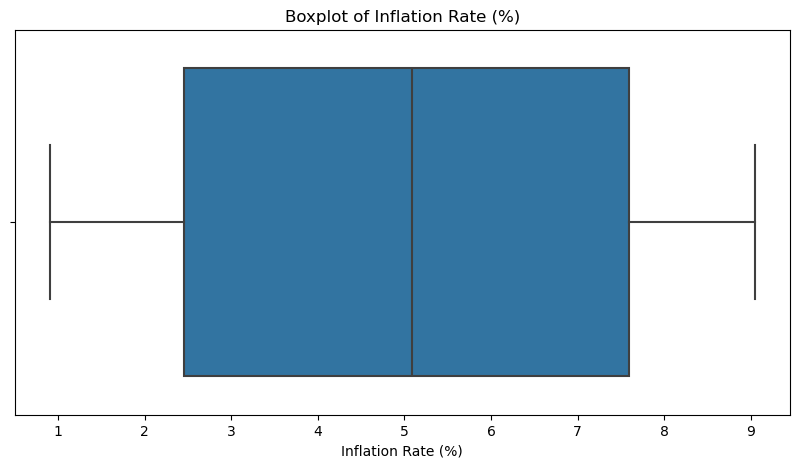

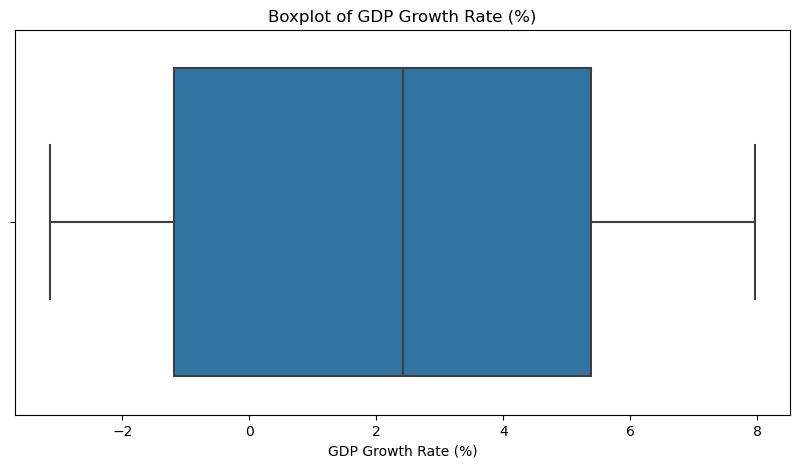

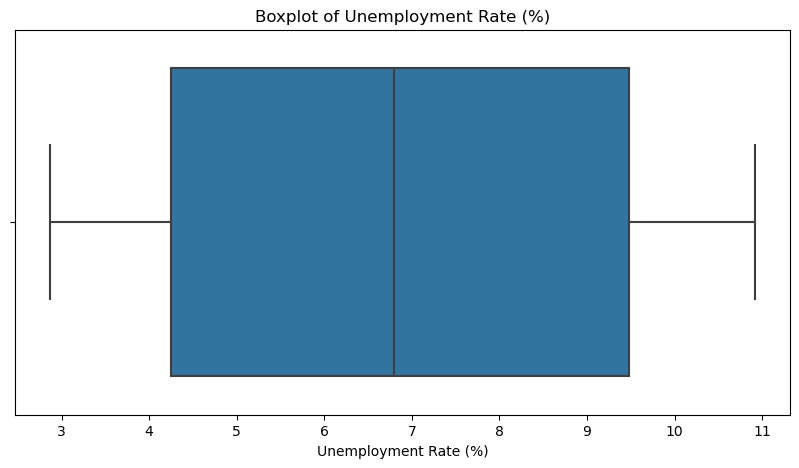

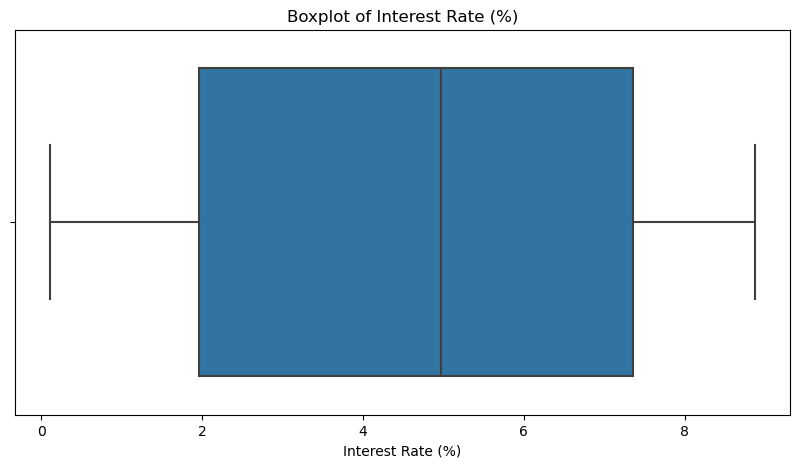

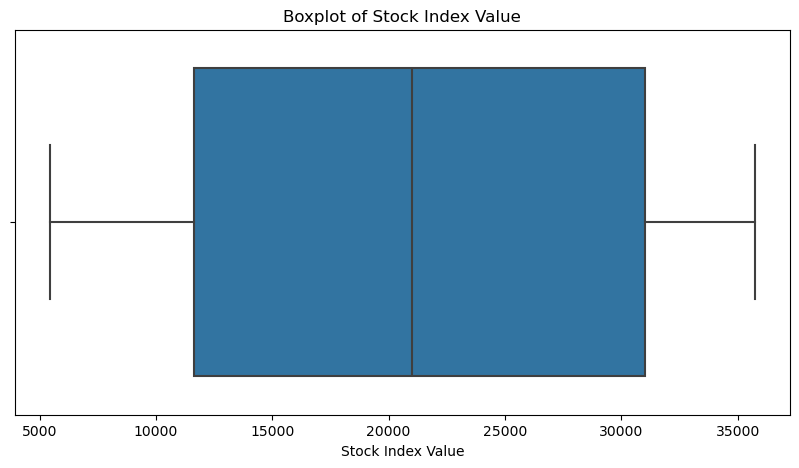

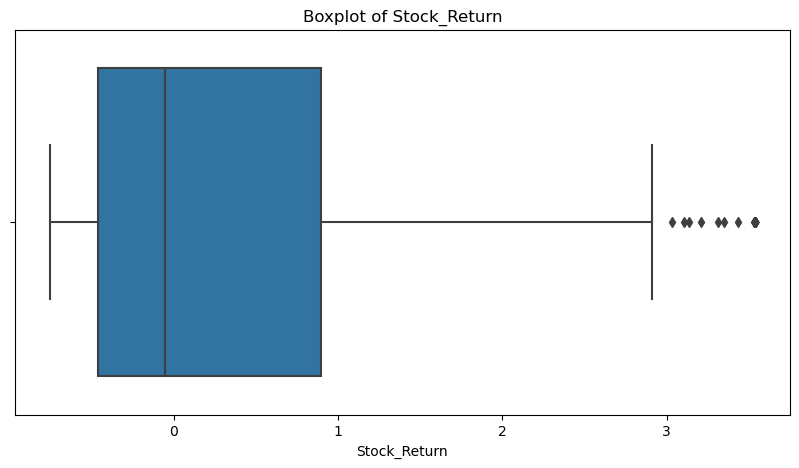

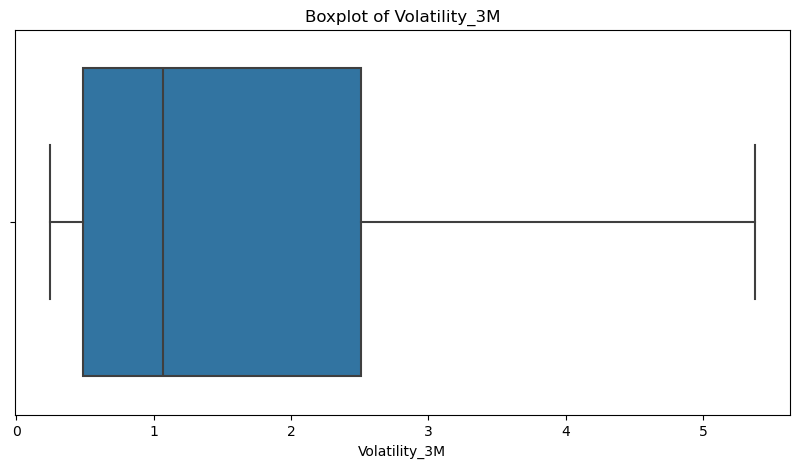

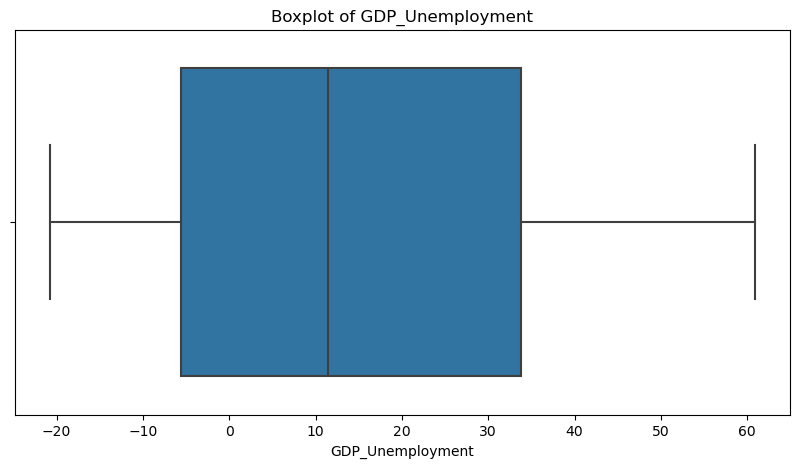

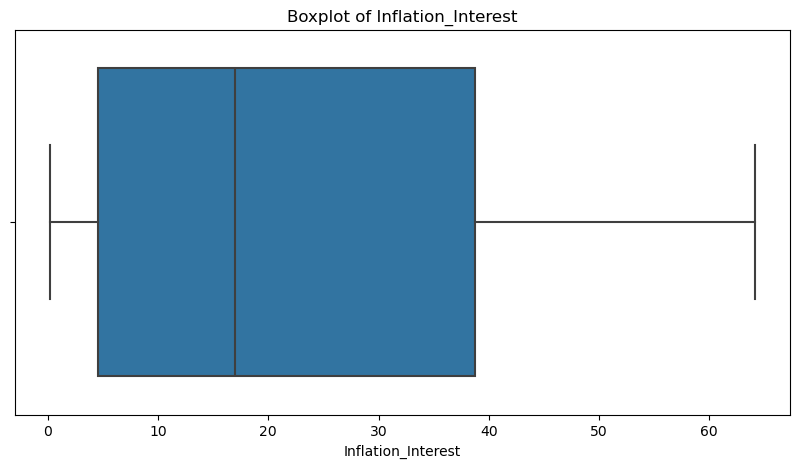

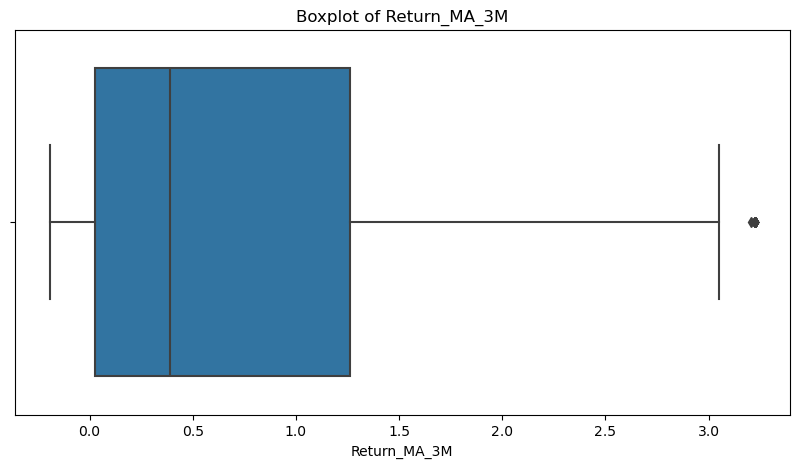

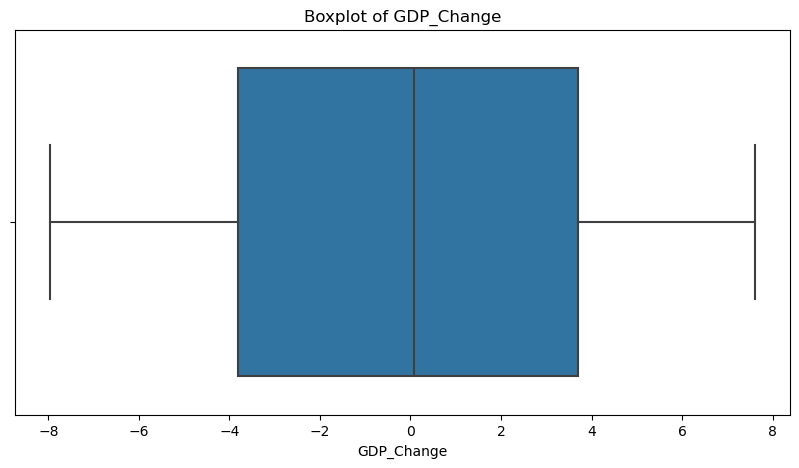

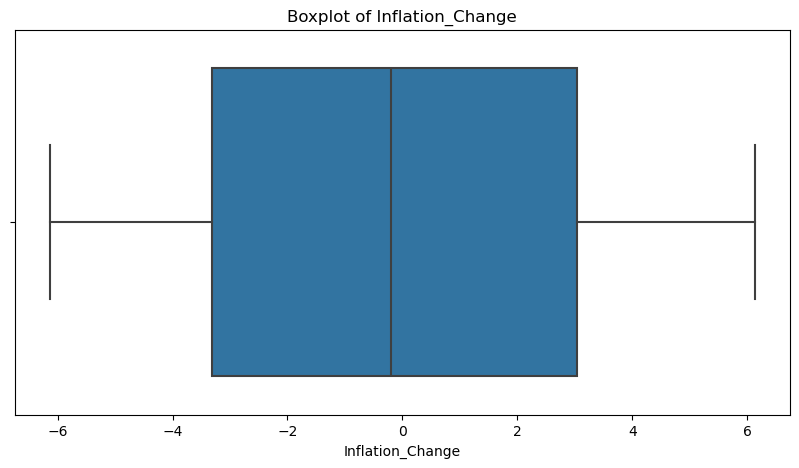

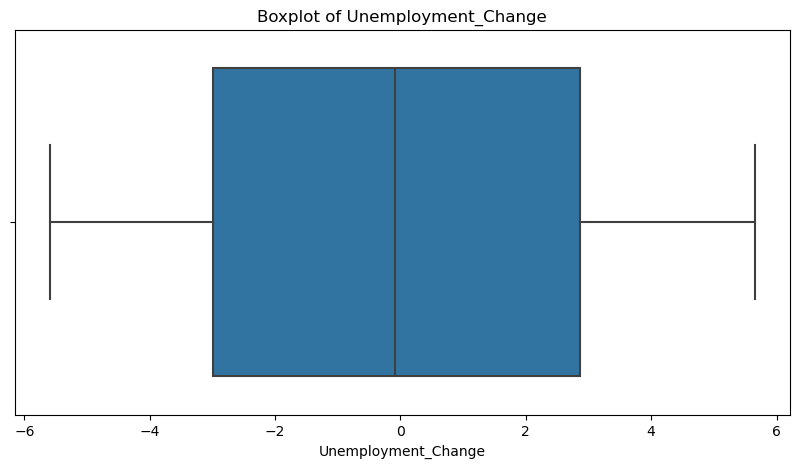

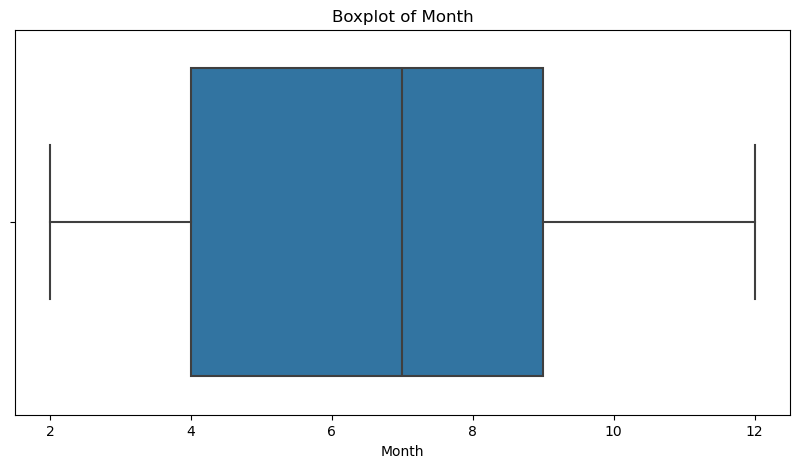

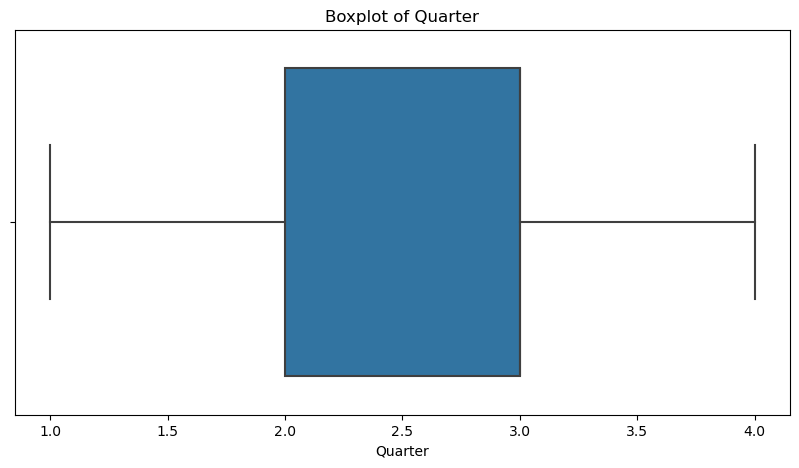

In [145]:
# using for loop to show all numaric columns 
for col in df.columns:
    if df[col].dtype != 'object'and df[col].dtype != 'bool':
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

In [146]:
df.shape    

(470, 19)

## Now there is no significant outlier

# EDA

###   GDP_Change,Unemployment,inflation_clange vs Volatility_Leve

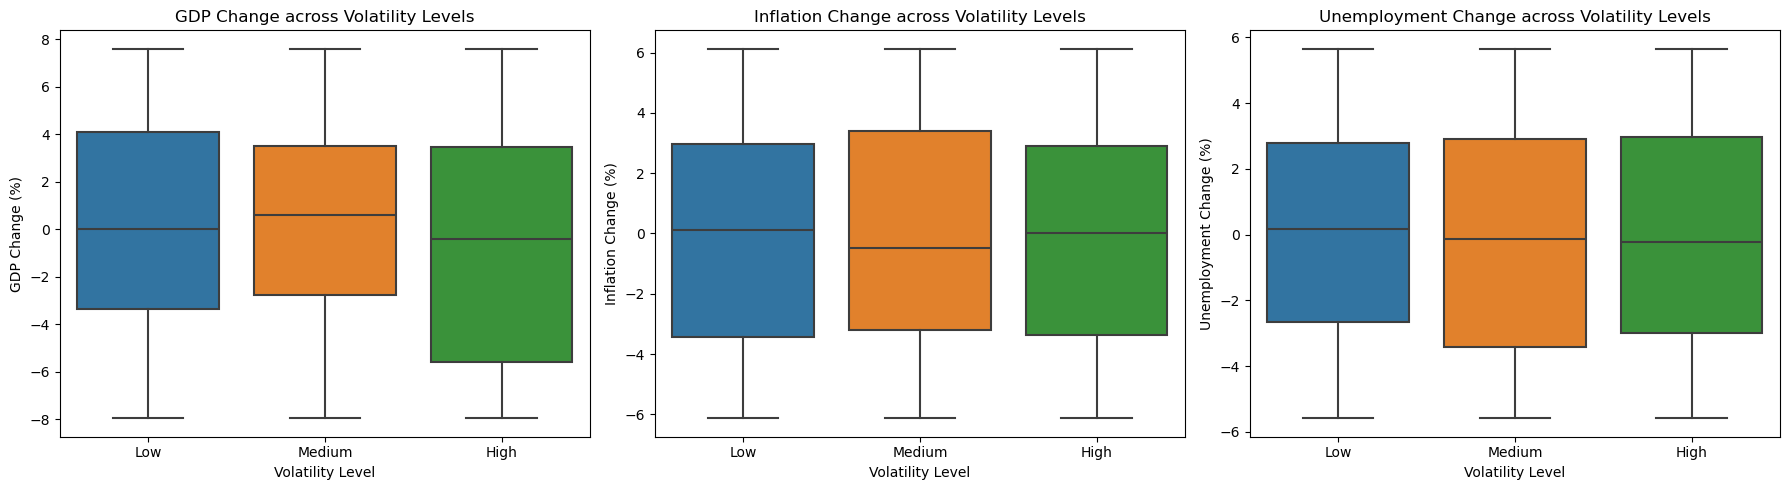

In [147]:


plt.figure(figsize=(18, 5))

# GDP_Change Plot
plt.subplot(1, 3, 1)
sns.boxplot(x='Volatility_Level', y='GDP_Change', data=df)
plt.title('GDP Change across Volatility Levels')
plt.xlabel('Volatility Level')
plt.ylabel('GDP Change (%)')

# Inflation_Change Plot
plt.subplot(1, 3, 2)
sns.boxplot(x='Volatility_Level', y='Inflation_Change', data=df)
plt.title('Inflation Change across Volatility Levels')
plt.xlabel('Volatility Level')
plt.ylabel('Inflation Change (%)')

# Unemployment_Change Plot
plt.subplot(1, 3, 3)
sns.boxplot(x='Volatility_Level', y='Unemployment_Change', data=df)
plt.title('Unemployment Change across Volatility Levels')
plt.xlabel('Volatility Level')
plt.ylabel('Unemployment Change (%)')

plt.tight_layout()
plt.show()

The boxplot analysis of macroeconomic change indicators—GDP_Change, Inflation_Change, and Unemployment_Change—across volatility regimes reveals noticeable distributional patterns.
Specifically, High volatility classes exhibit wider interquartile ranges and more frequent outliers in all three indicators, suggesting that abrupt macroeconomic transitions coincide with elevated market instability.
For instance, GDP_Change in high volatility periods includes deeper contractions, while Inflation_Change tends to display sharper upward spikes, indicating pricing shocks. Similarly, Unemployment_Change is more dispersed, reflecting labor market stress during volatile conditions.
These findings affirm the hypothesis that sudden economic shifts—not just absolute values—play a critical role in triggering volatility regime transitions, thereby supporting the inclusion of change-based features in predictive modeling.


## Feature Relationship Analysis

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1

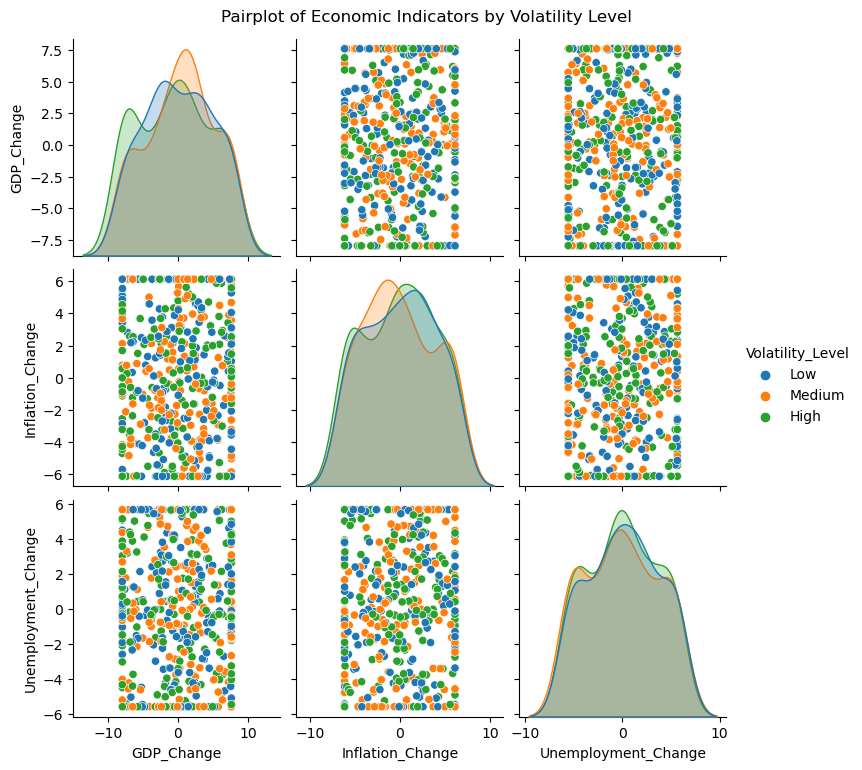

In [148]:

sns.pairplot(df, hue='Volatility_Level', vars=['GDP_Change', 'Inflation_Change', 'Unemployment_Change'])
plt.suptitle('Pairplot of Economic Indicators by Volatility Level', y=1.02)
plt.show()

Groupby Summary by Country

<Axes: xlabel='Country'>

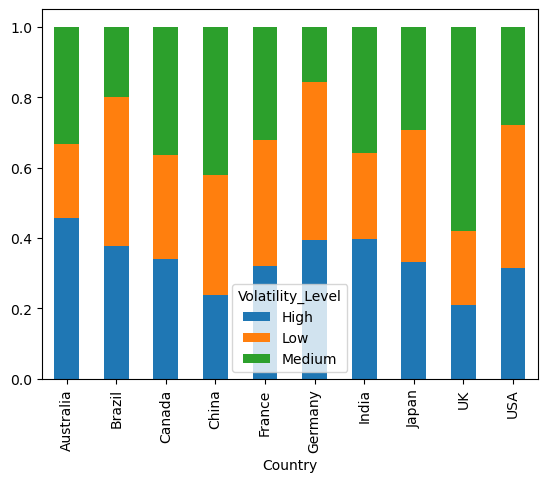

In [149]:
df.groupby('Country')['Volatility_Level'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

Time-based Pattern Analysi

<Axes: xlabel='Month', ylabel='count'>

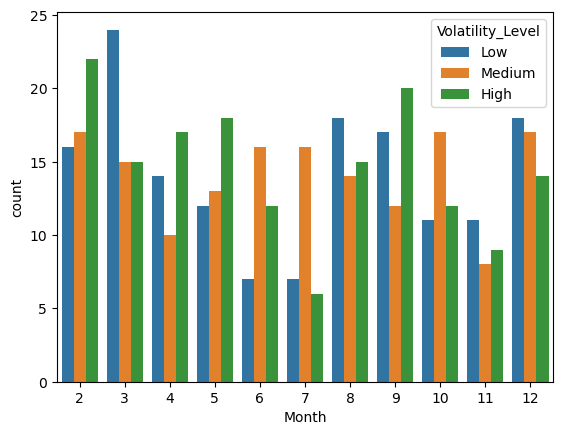

In [150]:
sns.countplot(x='Month', hue='Volatility_Level', data=df)

Dynamic Pattern Finding

<Axes: xlabel='Volatility_Level', ylabel='Stock_Return'>

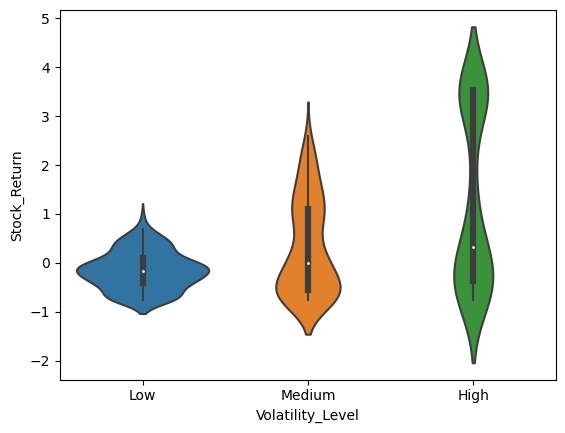

In [151]:
sns.violinplot(x='Volatility_Level', y='Stock_Return', data=df)

Return_Spike vs Volatility_Level (Countplot)

<Axes: xlabel='Volatility_Level', ylabel='count'>

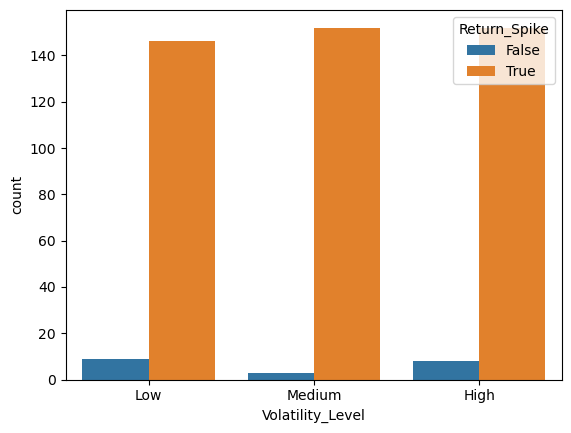

In [152]:
sns.countplot(x='Volatility_Level', hue='Return_Spike', data=df)

Heatmap of Top Features (Correlation Focus)

In [153]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [154]:
# Matrix → Pairwise sorted list

corr_matrix = numeric_df.corr().abs().unstack().sort_values(ascending=False)

# Remove self-pairs
corr_pairs = corr_matrix[corr_matrix < 1].drop_duplicates()

# Show top 10 correlated pairs
print(corr_pairs.head(15))

Quarter                Month                    0.972094
Volatility_3M          Return_MA_3M             0.960248
GDP_Unemployment       GDP Growth Rate (%)      0.920219
Inflation_Change       Inflation Rate (%)       0.731680
Interest Rate (%)      Inflation_Interest       0.699760
GDP Growth Rate (%)    GDP_Change               0.692002
Unemployment_Change    Unemployment Rate (%)    0.689959
GDP_Unemployment       GDP_Change               0.652485
Inflation_Interest     Inflation Rate (%)       0.611536
Stock_Return           Stock Index Value        0.472703
Inflation_Change       Inflation_Interest       0.472391
Return_MA_3M           Stock_Return             0.435336
Volatility_3M          Stock_Return             0.404245
Return_MA_3M           Stock Index Value        0.279052
Unemployment Rate (%)  GDP_Unemployment         0.231576
dtype: float64


In [157]:
import plotly.express as px


corr_df = numeric_df.corr().round(2)
fig = px.imshow(corr_df, text_auto=True, color_continuous_scale='turbo', aspect='auto')
fig.update_layout(title='Correlation Heatmap', width=900, height=700)
fig.show()

'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'